# **Tugas Besar Pembelajaran Mesin Tahap II**
Hanvito Michael Lee (1301190090)

Naufal Haritsah Luthfi (1301194073)


#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Train


##**Import Dataset**

In [ ]:
#Import Dataset dari google drive
!gdown --id 1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7

Downloading...
From: https://drive.google.com/uc?id=1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 92.2MB/s]


##**Data Understanding**


In [ ]:
df_train = pd.read_csv('kendaraan_train.csv')
df_train.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
df_train.shape

(285831, 12)

In [ ]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


##**Data Preprocessing**

In [ ]:
df_train = df_train.drop(['id'], axis=1)
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
262024,Wanita,NaN,1.0,28.0,1.0,1-2 Tahun,Tidak,33530.0,26.0,177.0,0
284010,Wanita,74.0,1.0,28.0,0.0,1-2 Tahun,Tidak,26440.0,122.0,45.0,0
26242,Pria,42.0,1.0,47.0,1.0,1-2 Tahun,Tidak,22421.0,26.0,104.0,0
263004,Pria,22.0,1.0,11.0,1.0,< 1 Tahun,Tidak,46866.0,152.0,236.0,0
229431,Wanita,41.0,1.0,46.0,0.0,1-2 Tahun,Pernah,28785.0,124.0,178.0,0


In [ ]:
df_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
df_train.nunique()

Jenis_Kelamin            2
Umur                    66
SIM                      2
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                45114
Kanal_Penjualan        151
Lama_Berlangganan      290
Tertarik                 2
dtype: int64

##**Handling Missing Value**

In [ ]:
print("Modus SIM", df_train['SIM'].mode())
print("Modus Kode Daerah :  ", df_train['Kode_Daerah'].mode())
print("Modus Jenis Kelamin : ", df_train['Jenis_Kelamin'].mode())
print("Modus Umur Kendaraan : ", df_train['Umur_Kendaraan'].mode())
print("Modus Kendaraan Rusak : ", df_train['Kendaraan_Rusak'].mode())
print("Modus Kanal Penjualan : ", df_train['Kanal_Penjualan'].mode())

Modus SIM 0    1.0
dtype: float64
Modus Kode Daerah :   0    28.0
dtype: float64
Modus Jenis Kelamin :  0    Pria
dtype: object
Modus Umur Kendaraan :  0    1-2 Tahun
dtype: object
Modus Kendaraan Rusak :  0    Pernah
dtype: object
Modus Kanal Penjualan :  0    152.0
dtype: float64


In [ ]:
df_train['SIM'] = df_train['SIM'].replace(np.NaN, 1.0)
df_train['Kode_Daerah'] = df_train['Kode_Daerah'].replace(np.NaN, 28.0)
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(np.NaN, "Pria") 
df_train['Umur'] = df_train['Umur'].replace(np.NaN, df_train['Umur'].mean())
df_train['Sudah_Asuransi'].fillna(method = 'bfill', inplace = True)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(np.NaN, "1-2 Tahun")
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(np.NaN, "Pernah")
df_train['Premi'] = df_train['Premi'].replace(np.NaN, df_train['Premi'].mean())
df_train['Kanal_Penjualan'] = df_train['Kanal_Penjualan'].replace(np.NaN, 152.0)
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].replace(np.NaN, df_train['Lama_Berlangganan'].mean())

In [ ]:
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_train.to_csv('data_train_setelah_handling_missing_value.csv', index=False)

## **Data Normalization**


In [ ]:
# Normalisasi Data dengan mengubah tipe data dari kolom Jenis_Kelamin,
# Kendaraan_Rusak dan Umur_Kendaraan
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace("Pria", 1.0) 
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace("Wanita", 0) 

df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace("Pernah", 1.0)
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace("Tidak", 0)

df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("< 1 Tahun", 0)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("1-2 Tahun", 1.0)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("> 2 Tahun", 2.0)

In [ ]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0


In [ ]:
df_train.to_csv('data_train_setelah_mengubah_data_kategorikal_menjadi_numerikal.csv', index=False)

In [ ]:
# Melakukan normalisasi tiap data pada kolom menggunakan metode Z score
for column in df_train.columns:
  if column != "Tertarik" :
    df_train[column] = (df_train[column] -
                           df_train[column].mean()) / df_train[column].std()    
    
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
184736,-1.136620,-0.782755,0.045248,0.426792,1.085734,-1.124496,-1.060574,-1.669851,0.709303,0.498816,0
236778,0.879798,-0.981015,0.045248,0.272011,1.085734,-1.124496,0.942882,-1.669851,0.858715,1.172665,0
163033,-1.136620,-1.245362,0.045248,-1.817533,-0.921033,-1.124496,0.942882,-0.259255,0.858715,0.155766,0
266694,0.879798,-0.121886,0.045248,0.194620,-0.921033,0.662438,0.942882,0.828162,-1.643930,1.135909,0
276624,-1.136620,0.472895,0.045248,0.194620,-0.921033,0.662438,0.942882,0.059258,-1.643930,1.160413,1


In [ ]:
df_train.to_csv('data_train_setelah_normalisasi_data.csv', index=False)

## **Handling Outliers**


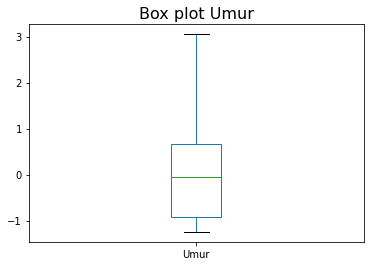

In [ ]:
df_train['Umur'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Umur', size=16)
plt.show()

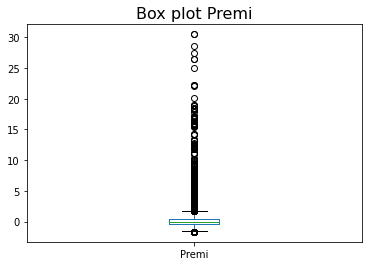

In [ ]:
df_train['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Premi', size=16)
plt.show()

In [ ]:
# Menggunakan IQR untuk menghilangkan outlier pada kolom Premi
data = df_train['Premi']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

for i in range(len(df_train['Premi'])):
   if df_train['Premi'][i] < lwr_bound:
     df_train['Premi'][i] = lwr_bound
   if df_train['Premi'][i] > upr_bound:
     df_train['Premi'][i] = upr_bound

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


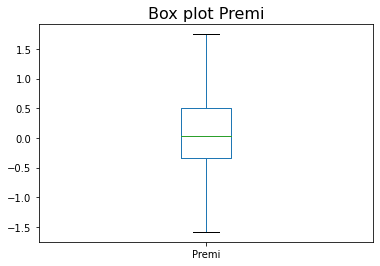

In [ ]:
df_train['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Premi', size=16)
plt.show()

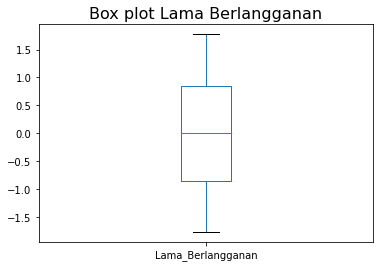

In [ ]:
df_train['Lama_Berlangganan'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Lama Berlangganan', size=16)
plt.show()

In [ ]:
df_train.to_csv('data_kendaraan_setelah_handling_outliers.csv', index=False)

## **Data Modelling**

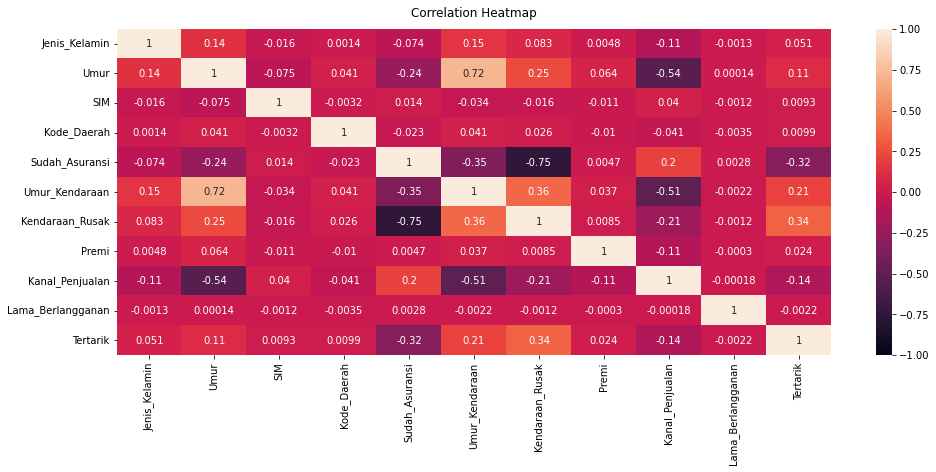

In [ ]:
# Visualisasi heatmap untuk melihat korelasi tiap kolom pada dataset.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Data Test

## Import Dataset


In [ ]:
!gdown --id 1udLnKQhxHn2hGTUFhwxxnVp9z-4i_k3I

Downloading...
From: https://drive.google.com/uc?id=1udLnKQhxHn2hGTUFhwxxnVp9z-4i_k3I
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 113MB/s]


## Data understanding


In [ ]:
df_test = pd.read_csv("kendaraan_test.csv")
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
df_test.shape

(47639, 11)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
df_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Data Preprocessing


In [ ]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
df_test.nunique()

Jenis_Kelamin            2
Umur                    66
SIM                      2
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                23374
Kanal_Penjualan        130
Lama_Berlangganan      290
Tertarik                 2
dtype: int64

## Data Normalization

In [ ]:
# Normalisasi Data dengan mengubah tipe data dari kolom Jenis_Kelamin,
# Kendaraan_Rusak dan Umur_Kendaraan
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].replace("Pria", 1.0) 
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].replace("Wanita", 0) 

df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace("Pernah", 1.0)
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace("Tidak", 0)

df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace("< 1 Tahun", 0)
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace("1-2 Tahun", 1.0)
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace("> 2 Tahun", 2.0)

In [ ]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,49,1,8,0,1.0,1.0,46963,26,145,0
1,1.0,22,1,47,1,0.0,0.0,39624,152,241,0
2,1.0,24,1,28,1,0.0,0.0,110479,152,62,0
3,1.0,46,1,8,1,1.0,0.0,36266,124,34,0
4,1.0,35,1,23,0,1.0,1.0,26963,152,229,0


In [ ]:
df_test.to_csv('data_test_setelah_mengubah_data_kategorikal_menjadi_numerikal.csv', index=False)

In [ ]:
for column in df_test.columns:
  if column != "Tertarik" :
    df_test[column] = (df_test[column] -
                           df_test[column].mean()) / df_test[column].std()    
    
df_test.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.090120,0.655004,0.045633,-1.387348,-0.918514,0.692510,0.990733,0.938622,-1.591142,-0.112952,0
1,0.917311,-1.081463,0.045633,1.564212,1.088692,-1.070649,-1.009332,0.516956,0.735182,1.034795,0
2,0.917311,-0.952836,0.045633,0.126273,1.088692,-1.070649,-1.009332,4.587962,0.735182,-1.105275,0
3,0.917311,0.462063,0.045633,-1.387348,1.088692,0.692510,-1.009332,0.324021,0.218221,-1.440035,0
4,0.917311,-0.245386,0.045633,-0.252132,-0.918514,0.692510,0.990733,-0.210487,0.735182,0.891326,0


In [ ]:
df_test.to_csv('data_test_setelah_normalisasi_data.csv', index=False)

## Data Modelling

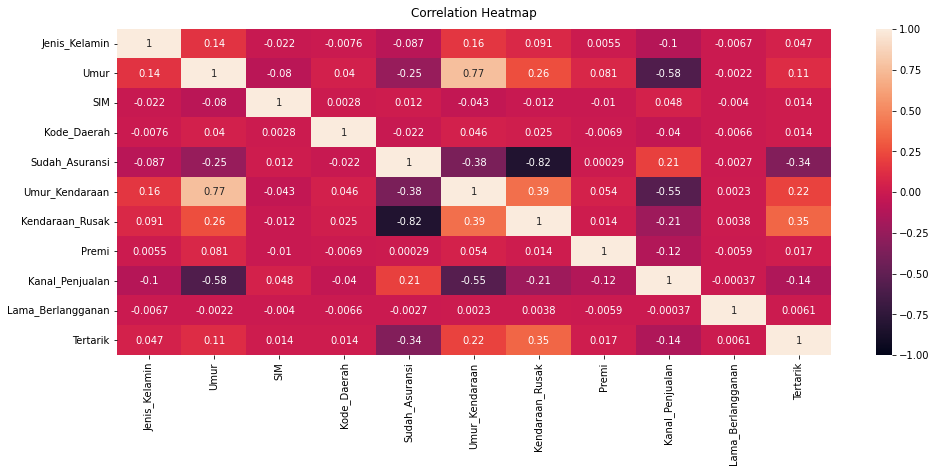

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pemodelan Classification


## Import Library

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

## Model Prediction


In [ ]:
x_train = df_train[["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]]
x_test = df_test[["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]]

y_train = df_train.loc[:,["Tertarik"]]
y_test = df_test.loc[:,["Tertarik"]]

### Logistic Regression


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.88


### Decision Tree

In [ ]:
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


### K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


### Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LDA classifier on training set: 0.88
Accuracy of LDA classifier on test set: 0.88


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.70
Accuracy of GNB classifier on test set: 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluation

## Logistic Regression


In [ ]:
pred = logreg.predict(x_test)
cnf = confusion_matrix(y_test, pred)
cnf

array([[41730,    48],
       [ 5832,    29]])

Text(0.5, 257.44, 'Predicted label')

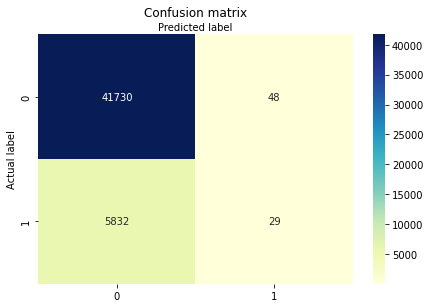

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.8765717164508071
Precision: 0.37662337662337664
Recall: 0.004947961098788603


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.38      0.00      0.01      5861

    accuracy                           0.88     47639
   macro avg       0.63      0.50      0.47     47639
weighted avg       0.82      0.88      0.82     47639



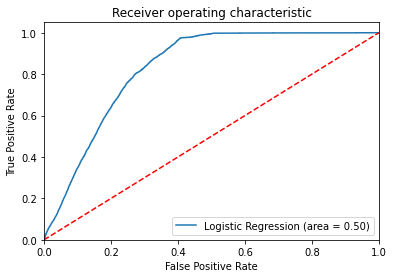

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Eksperimen 

In [ ]:
x = df_train[["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]]
y = df_train.loc[:,["Tertarik"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.88
Accuracy of Logistic regression classifier on test set: 0.88


## Decision Tree

In [ ]:
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.82


## K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.86


## Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LDA classifier on training set: 0.88
Accuracy of LDA classifier on test set: 0.88


## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.70
Accuracy of GNB classifier on test set: 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluasi (Logistic Regression)

In [ ]:
pred = logreg.predict(x_test)
cnf = confusion_matrix(y_test, pred)
cnf

array([[75403,    36],
       [10274,    37]])

Text(0.5, 257.44, 'Predicted label')

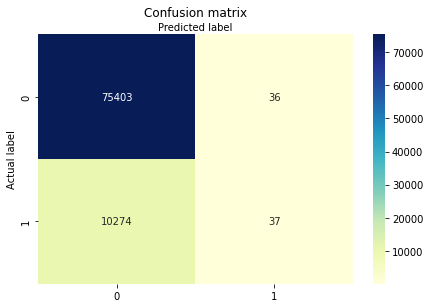

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     75439
           1       0.51      0.00      0.01     10311

    accuracy                           0.88     85750
   macro avg       0.69      0.50      0.47     85750
weighted avg       0.84      0.88      0.82     85750



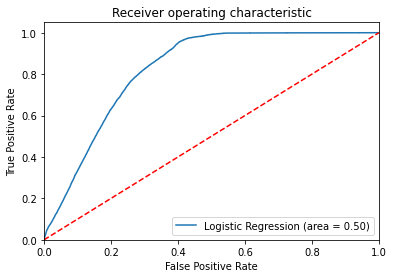

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()